In [2]:
import pandas as pd

In [3]:
dataset = pd.read_excel('SIA_DM .xlsm')

In [4]:
dataset.head()

,Customer,SSN,Birthdate,Age,Region,CredCardUser,Income,Purchases,AmtSpent
0,1,539-84-9599,1944-10-26,77,East,0,62900,4,2080
1,2,444-05-4079,1932-01-01,67,West,1,23300,0,0
2,3,418-18-5649,1973-08-17,25,East,1,48700,8,3990
3,4,065-63-3311,1947-08-02,51,West,1,137600,2,920
4,5,059-58-9566,1948-10-03,50,East,0,101400,2,1000


In [5]:
dataset.shape

(1500, 9)

In [6]:
import numpy as np
# select numeric columns
df_numeric = dataset.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Customer' 'Age' 'CredCardUser' 'Income' 'Purchases' 'AmtSpent']


In [7]:
# select non numeric columns
df_non_numeric = dataset.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['SSN' 'Birthdate' 'Region']


In [9]:
df = dataset.drop_duplicates(subset=["SSN"], keep='first')
df.shape

(1498, 9)

In [10]:
df['Birthdate']= pd.to_datetime(df['Birthdate'], infer_datetime_format=True)
df['Birthdate']

C:\Users\guido\AppData\Local\Temp\ipykernel_16684\3099948170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Birthdate']= pd.to_datetime(df['Birthdate'], infer_datetime_format=True)


0      1944-10-26
1      1932-01-01
2      1973-08-17
3      1947-08-02
4      1948-10-03
          ...    
1495   1965-09-28
1496   1930-07-31
1497   1954-07-21
1498   1966-10-30
1499   1934-09-23
Name: Birthdate, Length: 1498, dtype: datetime64[ns]

In [11]:
import datetime
d1 = datetime.datetime(2000, 1, 1)
df['Birthdate'] = np.where(df['Birthdate'] > d1, df['Birthdate'] - datetime.timedelta(days=36525), df['Birthdate'])

df.drop(df[df['Age'] <= 0].index, inplace = True)
print(df.shape)

(1486, 9)


C:\Users\guido\AppData\Local\Temp\ipykernel_16684\823139045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Birthdate'] = np.where(df['Birthdate'] > d1, df['Birthdate'] - datetime.timedelta(days=36525), df['Birthdate'])
c:\Users\guido\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


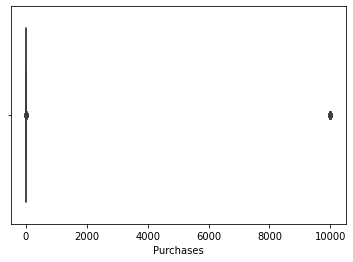

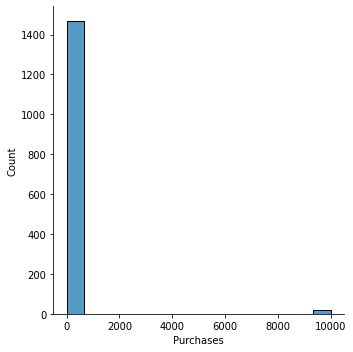

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = df['Purchases'])
plt.show()
sns.displot(df['Purchases'], bins = 15, kde=False)
plt.show()

In [13]:
df.drop(df[df['Purchases'] == 9999].index, inplace = True)
print(df.shape)

(1468, 9)


c:\Users\guido\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


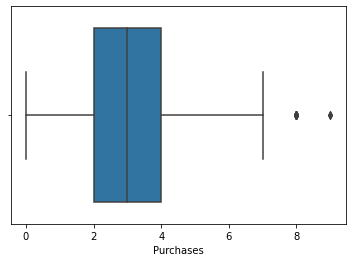

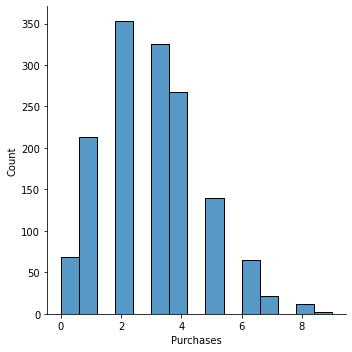

In [14]:
sns.boxplot(x = df['Purchases'])
plt.show()
sns.displot(df['Purchases'], bins = 15, kde=False)
plt.show()

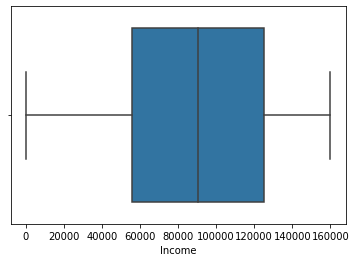

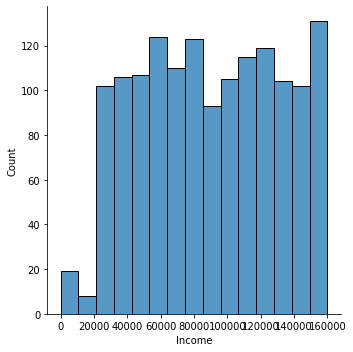

In [15]:
sns.boxplot(x = df['Income'])
plt.show()
sns.displot(df['Income'], bins = 15, kde=False)
plt.show()